In [1]:
library(quantreg)
library(ggplot2)

Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve




In [2]:
qr_coeff <- function(x, y, q, deg = 1) {
    if (deg > 1) {
        return(coef(rq(y ~ poly(x, deg), q)))
    } else {
        return(coef(rq(y ~ x, q)))
    }
}

Smoothing formula not specified. Using: y ~ x



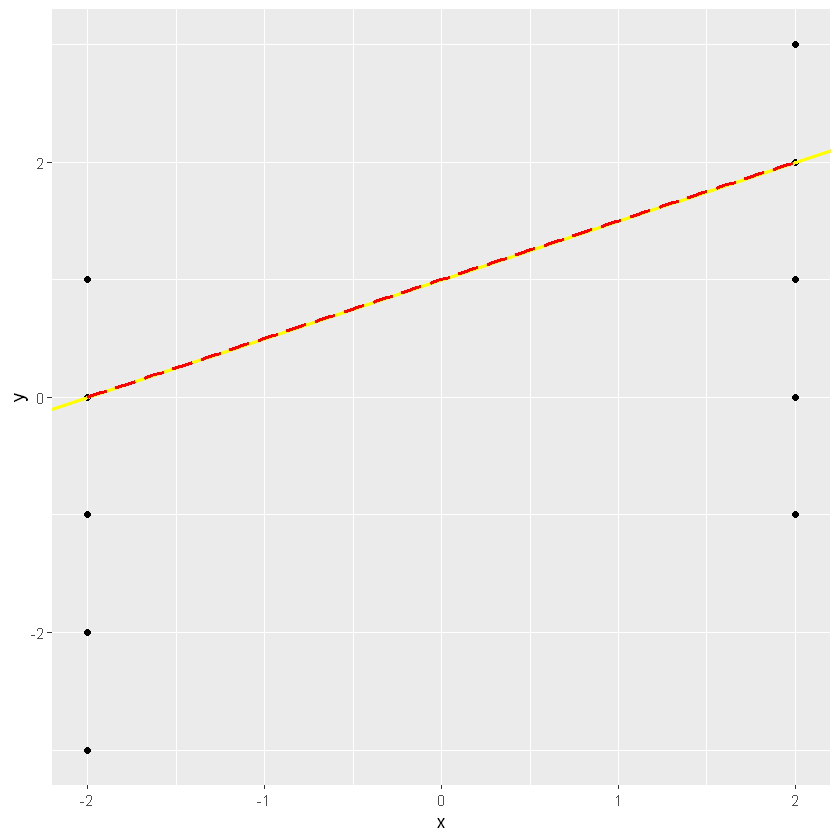

In [3]:
df1 <- data.frame(
    x = c(-2, -2, -2, -2, -2, 2, 2, 2, 2, 2),
    y = c(-3, -2, -1, 0, 1, -1, 0, 1, 2, 3)
)
q <- 0.75
c <- qr_coeff(df1$x, df1$y, q)
ggplot(df1, aes(x, y)) +
    geom_point() +
    geom_abline(intercept = c[1], slope = c[2], size = 1, color = "yellow") +
    geom_quantile(quantiles = c(q), size = 1, color = "red", linetype = "longdash")

Smoothing formula not specified. Using: y ~ x



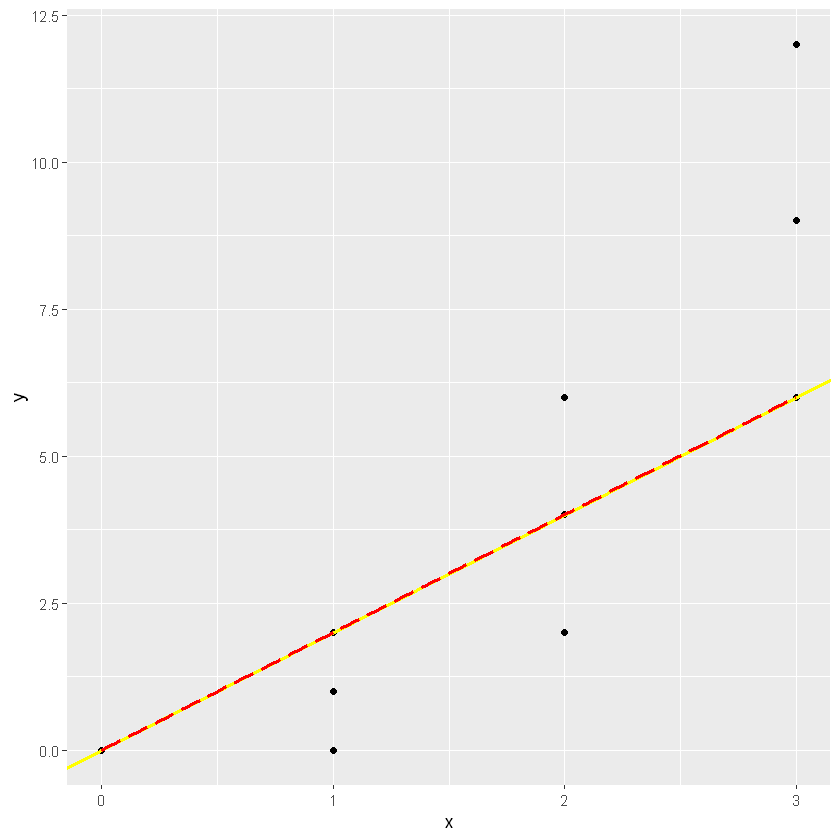

In [6]:
df2 <- data.frame(
    x = c(0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3),
    y = c(0, 0, 0, 0, 1, 2, 2, 4, 6, 6, 9, 12)
)
q <- 0.5
c <- qr_coeff(df2$x, df2$y, q)
ggplot(df2, aes(x, y)) +
    geom_point() +
    geom_abline(intercept = c[1], slope = c[2], size = 1, color = "yellow") +
    geom_quantile(quantiles = c(q), size = 1, color = "red", linetype = "longdash")

Smoothing formula not specified. Using: y ~ x



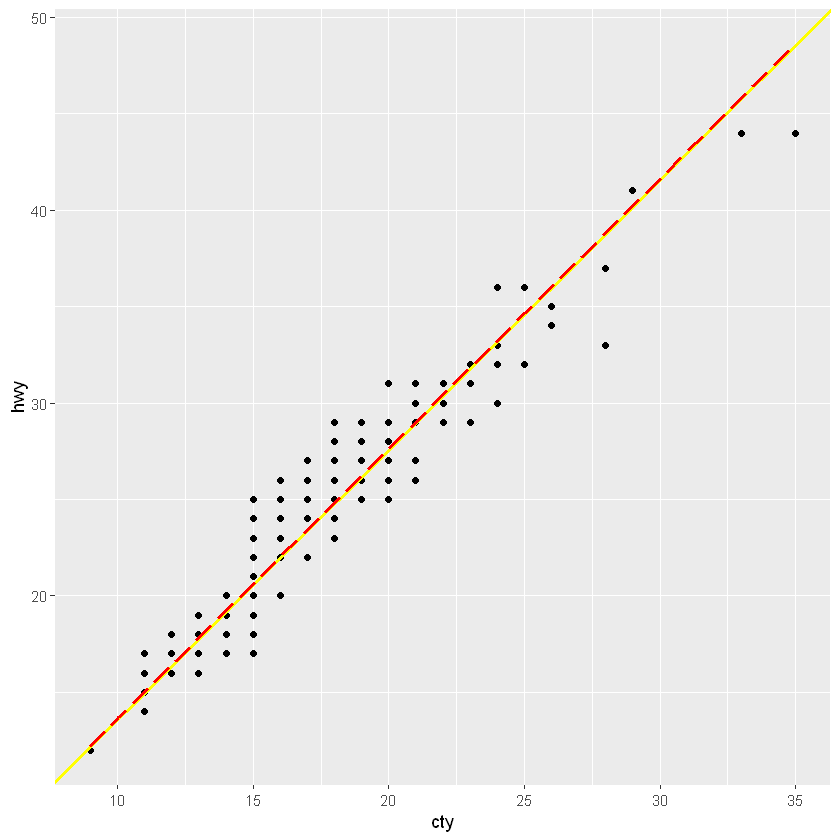

In [5]:
mpg_df <- read.csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
q <- 0.5
c <- qr_coeff(mpg_df$cty, mpg_df$hwy, q)
ggplot(mpg_df, aes(cty, hwy)) +
    geom_point() +
    geom_abline(intercept = c[1], slope = c[2], size = 1, color = "yellow") +
    geom_quantile(quantiles = c(q), size = 1, color = "red", linetype = "longdash")